In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split 
from time import process_time_ns

# Regression Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Air Quality UCI/AirQualityUCI.csv')

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/3/2004,18.00.00,2.6,1360,150.0,11.9,1046,166,1056,113,1692,1268.0,13.6,48.9,0.7578
1,10/3/2004,19.00.00,2.0,1292,112.0,9.4,955,103,1174,92,1559,972.0,13.3,47.7,0.7255
2,10/3/2004,20.00.00,2.2,1402,88.0,9.0,939,131,1140,114,1555,1074.0,11.9,54.0,0.7502
3,10/3/2004,21.00.00,2.2,1376,80.0,9.2,948,172,1092,122,1584,1203.0,11.0,60.0,0.7867
4,10/3/2004,22.00.00,1.6,1272,51.0,6.5,836,131,1205,116,1490,1110.0,11.2,59.6,0.7888


# Data Pre-Processing

In [ ]:
columns = ['Date', 'Time', 'AH']
df.drop(columns=columns, axis=1, inplace=True)

In [ ]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,2.6,1360,150.0,11.9,1046,166,1056,113,1692,1268.0,13.6,48.9
1,2.0,1292,112.0,9.4,955,103,1174,92,1559,972.0,13.3,47.7
2,2.2,1402,88.0,9.0,939,131,1140,114,1555,1074.0,11.9,54.0
3,2.2,1376,80.0,9.2,948,172,1092,122,1584,1203.0,11.0,60.0
4,1.6,1272,51.0,6.5,836,131,1205,116,1490,1110.0,11.2,59.6


In [ ]:
def normalizeCol(col):
  max = col.max()
  min = col.min()
  diff = max-min
  for x in range(len(col)):
    col[x] = (col[x]-min)/diff

In [ ]:
for col in df:
    normalizeCol(df[col])
df.head()

<ipython-input-43-b47179d3bff7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[x] = (col[x]-min)/diff


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,0.124447,0.696429,0.251980,0.139316,0.516156,0.217987,0.435657,0.158161,0.635966,0.539111,0.830482,0.862141
1,0.124079,0.666071,0.224622,0.137673,0.478459,0.180465,0.476587,0.147549,0.591261,0.430408,0.829316,0.857984
2,0.124201,0.715179,0.207343,0.137410,0.471831,0.197141,0.464794,0.158666,0.589916,0.467866,0.823872,0.879806
3,0.124201,0.703571,0.201584,0.137541,0.475559,0.221560,0.448144,0.162708,0.599664,0.515241,0.820373,0.900589
4,0.123833,0.657143,0.180706,0.135766,0.429163,0.197141,0.487340,0.159677,0.568067,0.481087,0.821151,0.899203


In [ ]:
for col in df.columns:
  print(col, df[col].isnull().values.any())

CO(GT) False
PT08.S1(CO) False
NMHC(GT) False
C6H6(GT) False
PT08.S2(NMHC) False
NOx(GT) False
PT08.S3(NOx) False
NO2(GT) False
PT08.S4(NO2) False
PT08.S5(O3) False
T False
RH False


In [ ]:
labelCol = ['RH']
X = df[df.columns[~df.columns.isin(labelCol)]]
Y = df[labelCol]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 0)
X_train.insert(0, 'bias', 1)
X_test.insert(0, 'bias', 1)

In [ ]:
print(X_train.iloc[0].to_numpy().shape, Y_train.shape)

(12,) (7017, 1)


# Model Training Using TGD and SGD

In [ ]:
def linear_regression_total_gradient_descent(X_train, Y_train, epochs):
  weights = np.zeros(len(X_train.columns))
  learning_rate = 1e-5
  regularization = 1e-2
  for epoch in range(epochs):
    Y_pred = (weights @ X_train.T)
    weights -= learning_rate*((Y_pred - Y_train.T)@X_train + regularization*weights)
  return weights

def linear_regression_stochastic_gradient_descent(X_train, Y_train, iterations):
  weights = np.zeros(len(X_train.columns))
  learning_rate = 1e-2
  regularization = 1e-2
  for iter in range(iterations):
    randomIndex = random.randint(0, len(X_train)-1)
    Y_pred = (weights @ X_train.iloc[randomIndex].to_numpy().reshape(-1, 1))
    weights -= learning_rate*((Y_pred - Y_train.iloc[randomIndex].to_numpy()) @ X_train.iloc[randomIndex].to_numpy().reshape(1, -1) + regularization*weights)
  return weights


def log_regression_batch_gradient_descent(X_train, Y_train, iterations, batchSize):
  weights = np.zeros(len(X_train.columns))
  learning_rate = 1e-4
  regularization = 1e-5
  for iter in range(iterations):
      randomIndices = np.random.randint(len(X_train)-1, size=(batchSize))
      Y_pred = weights @ X_train.iloc[randomIndices].T.to_numpy()
      weights -= learning_rate*((Y_pred - Y_train.iloc[randomIndices].T.to_numpy()).reshape(-1) @ X_train.iloc[randomIndices].to_numpy() + regularization*weights)
      weights = weights
  return weights.reshape(-1)

# Making Predictions

In [ ]:
def RSSE(pred, Y_test):
  Y_test = Y_test.to_numpy().reshape(-1)
  pred = pred.to_numpy()
  rsse = 0
  for i in range(len(pred)):
    rsse += (pred[i] - Y_test[i])**2
  return rsse

In [ ]:
def pred(weights, X_test, Y_test):
  pred = weights @ X_test.T
  return RSSE(pred, Y_test)

In [ ]:
epochs = [i for i in range(5, 100, 10)]
iterations = [i for i in range(1, 100, 5)]

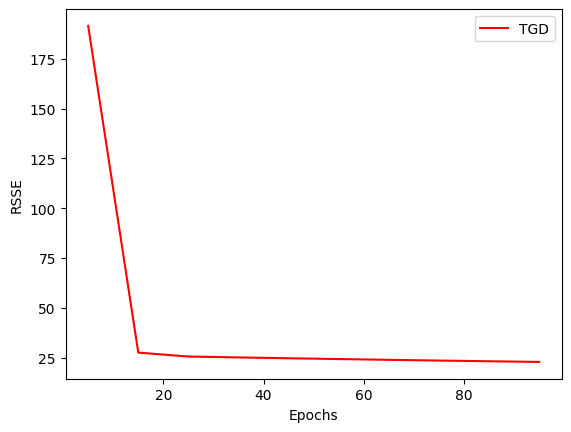

In [ ]:
w1 = []
w2 = []
for epoch in epochs:
  w1.append(linear_regression_total_gradient_descent(X_train, Y_train, epoch))
for iter in iterations:
  w2.append(linear_regression_stochastic_gradient_descent(X_train, Y_train, iter))

score1 = []
score2 = []
for w in w1:
  score1.append(pred(w, X_test, Y_test))
for w in w2:
  score2.append(pred(w, X_test, Y_test))

plt.plot(epochs, score1, color='r')
plt.xlabel('Epochs')
plt.ylabel('RSSE')
plt.legend(['TGD'], loc='upper right')
plt.show()

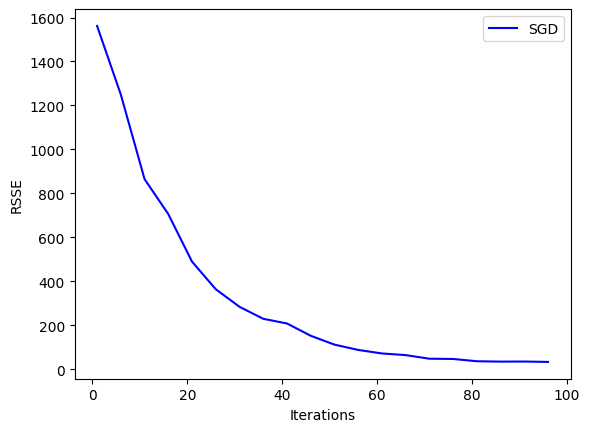

In [ ]:
plt.plot(iterations, score2, color='b')
plt.xlabel('Iterations')
plt.ylabel('RSSE')
plt.legend(['SGD'], loc='upper right')
plt.show()

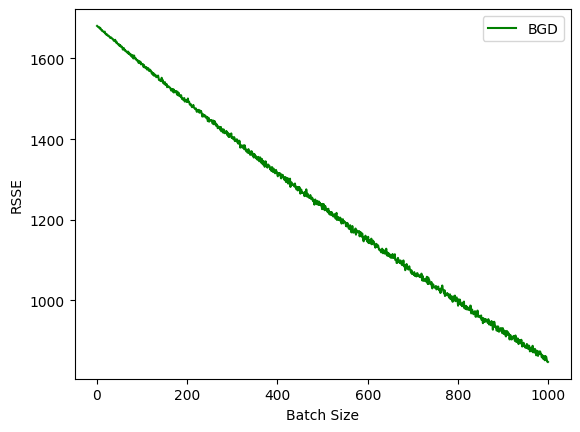

In [ ]:
batchSize = 1000
batch = []
error = []
for i in range(1, batchSize):
  batch.append(i)
  w3 = log_regression_batch_gradient_descent(X_train, Y_train, 1, i)
  error.append(pred(w3, X_test, Y_test))

plt.plot(batch, error, color='g', label='BGD')
plt.xlabel('Batch Size')
plt.ylabel('RSSE')
plt.legend(['BGD'], loc='upper right')
plt.show()

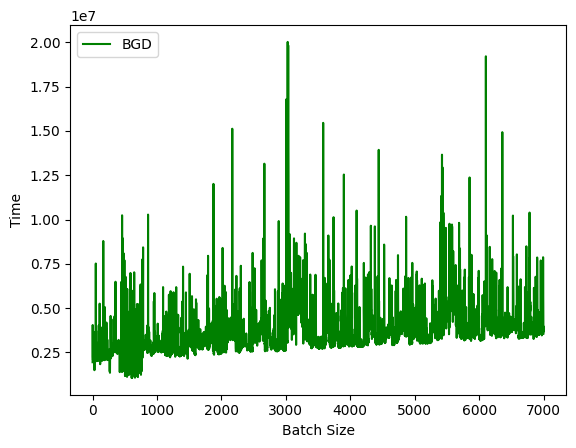

In [ ]:
batchSize = 7000
batch = []
error = []
times = []
for i in range(1, batchSize):
  batch.append(i)
  start = process_time_ns()
  w3 = log_regression_batch_gradient_descent(X_train, Y_train, 1, i)
  end = process_time_ns()
  times.append(end-start)
  error.append(pred(w3, X_test, Y_test))

plt.plot(batch, times, color='g', label='BGD')
plt.xlabel('Batch Size')
plt.ylabel('Time')
plt.legend(['BGD'], loc='upper left')
plt.show()

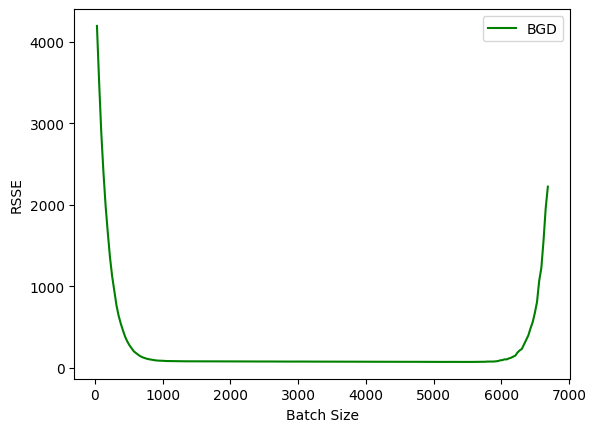

In [ ]:
batch = [32*i for i in range(1, 210)]
error = []
for i in batch:
  w3 = log_regression_batch_gradient_descent(X_train, Y_train, 10, i)
  error.append(pred(w3, X_train, Y_train))

plt.plot(batch, error, color='g', label='BGD')
plt.xlabel('Batch Size')
plt.ylabel('RSSE')
plt.legend(['BGD'], loc='upper right')
plt.show()

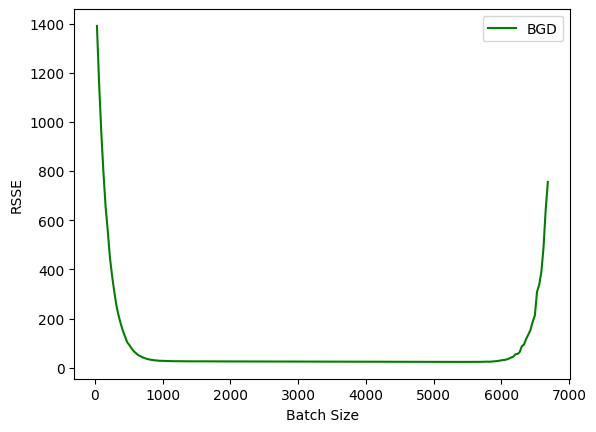

In [ ]:
batch = [32*i for i in range(1, 210)]
error = []
for i in batch:
  w3 = log_regression_batch_gradient_descent(X_train, Y_train, 10, i)
  error.append(pred(w3, X_test, Y_test))

plt.plot(batch, error, color='g', label='BGD')
plt.xlabel('Batch Size')
plt.ylabel('RSSE')
plt.legend(['BGD'], loc='upper right')
plt.show()

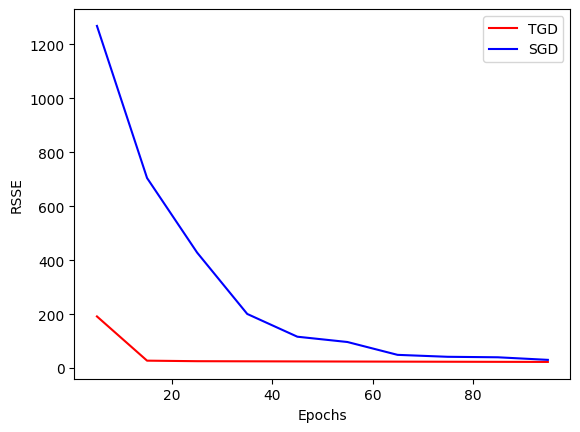

In [ ]:
w1 = []
w2 = []
for epoch in epochs:
  w1.append(linear_regression_total_gradient_descent(X_train, Y_train, epoch))

for epoch in epochs:
  w2.append(linear_regression_stochastic_gradient_descent(X_train, Y_train, epoch))

score1 = []
score2 = []
for w in w1:
  score1.append(pred(w, X_test, Y_test))
for w in w2:
  score2.append(pred(w, X_test, Y_test))

plt.plot(epochs, score1, color='r')
plt.plot(epochs, score2, color='b')
plt.xlabel('Epochs')
plt.ylabel('RSSE')
plt.legend(['TGD', 'SGD'], loc='upper right')
plt.show()

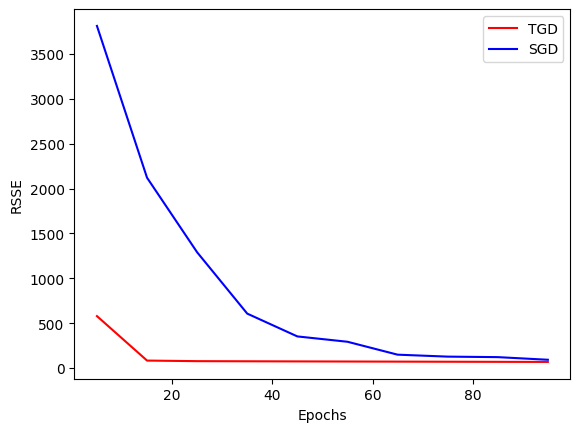

In [ ]:
score1 = []
score2 = []
for w in w1:
  score1.append(pred(w, X_train, Y_train))
for w in w2:
  score2.append(pred(w, X_train, Y_train))

plt.plot(epochs, score1, color='r')
plt.plot(epochs, score2, color='b')
plt.xlabel('Epochs')
plt.ylabel('RSSE')
plt.legend(['TGD', 'SGD'], loc='upper right')
plt.show()

In [ ]:
start = process_time_ns()
w1 = linear_regression_total_gradient_descent(X_train, Y_train, 15)
end = process_time_ns()
print('TGD Time :', end-start, 'ns')
start = process_time_ns()
w2 = linear_regression_stochastic_gradient_descent(X_train, Y_train, 80)
end = process_time_ns()
print('SGD Time :', end-start, 'ns')
start = process_time_ns()
w3 = log_regression_batch_gradient_descent(X_train, Y_train, 1, 1000)
end = process_time_ns()
print('BGD Time :', end-start, 'ns')

TGD Time : 155697390 ns
SGD Time : 65333498 ns
BGD Time : 2413353 ns
